
# <span style="color:rgb(213,80,0)">AR data.</span>

This function creates Figures 3.1-3.5, 3.8 and 3.9. Figures 3.1-3.5: traditional non robust analysis. Figures 3.8-3.9: traditional robust analysis based on S and MM estimators.

## Beginning of code.

In [1]:
close all
load('multiple_regression.txt');
y=multiple_regression(:,4);
X=multiple_regression(:,1:3);
prin=0;
n=length(y);

## Create Figure 3.1

outLS=fitlm(X,y);



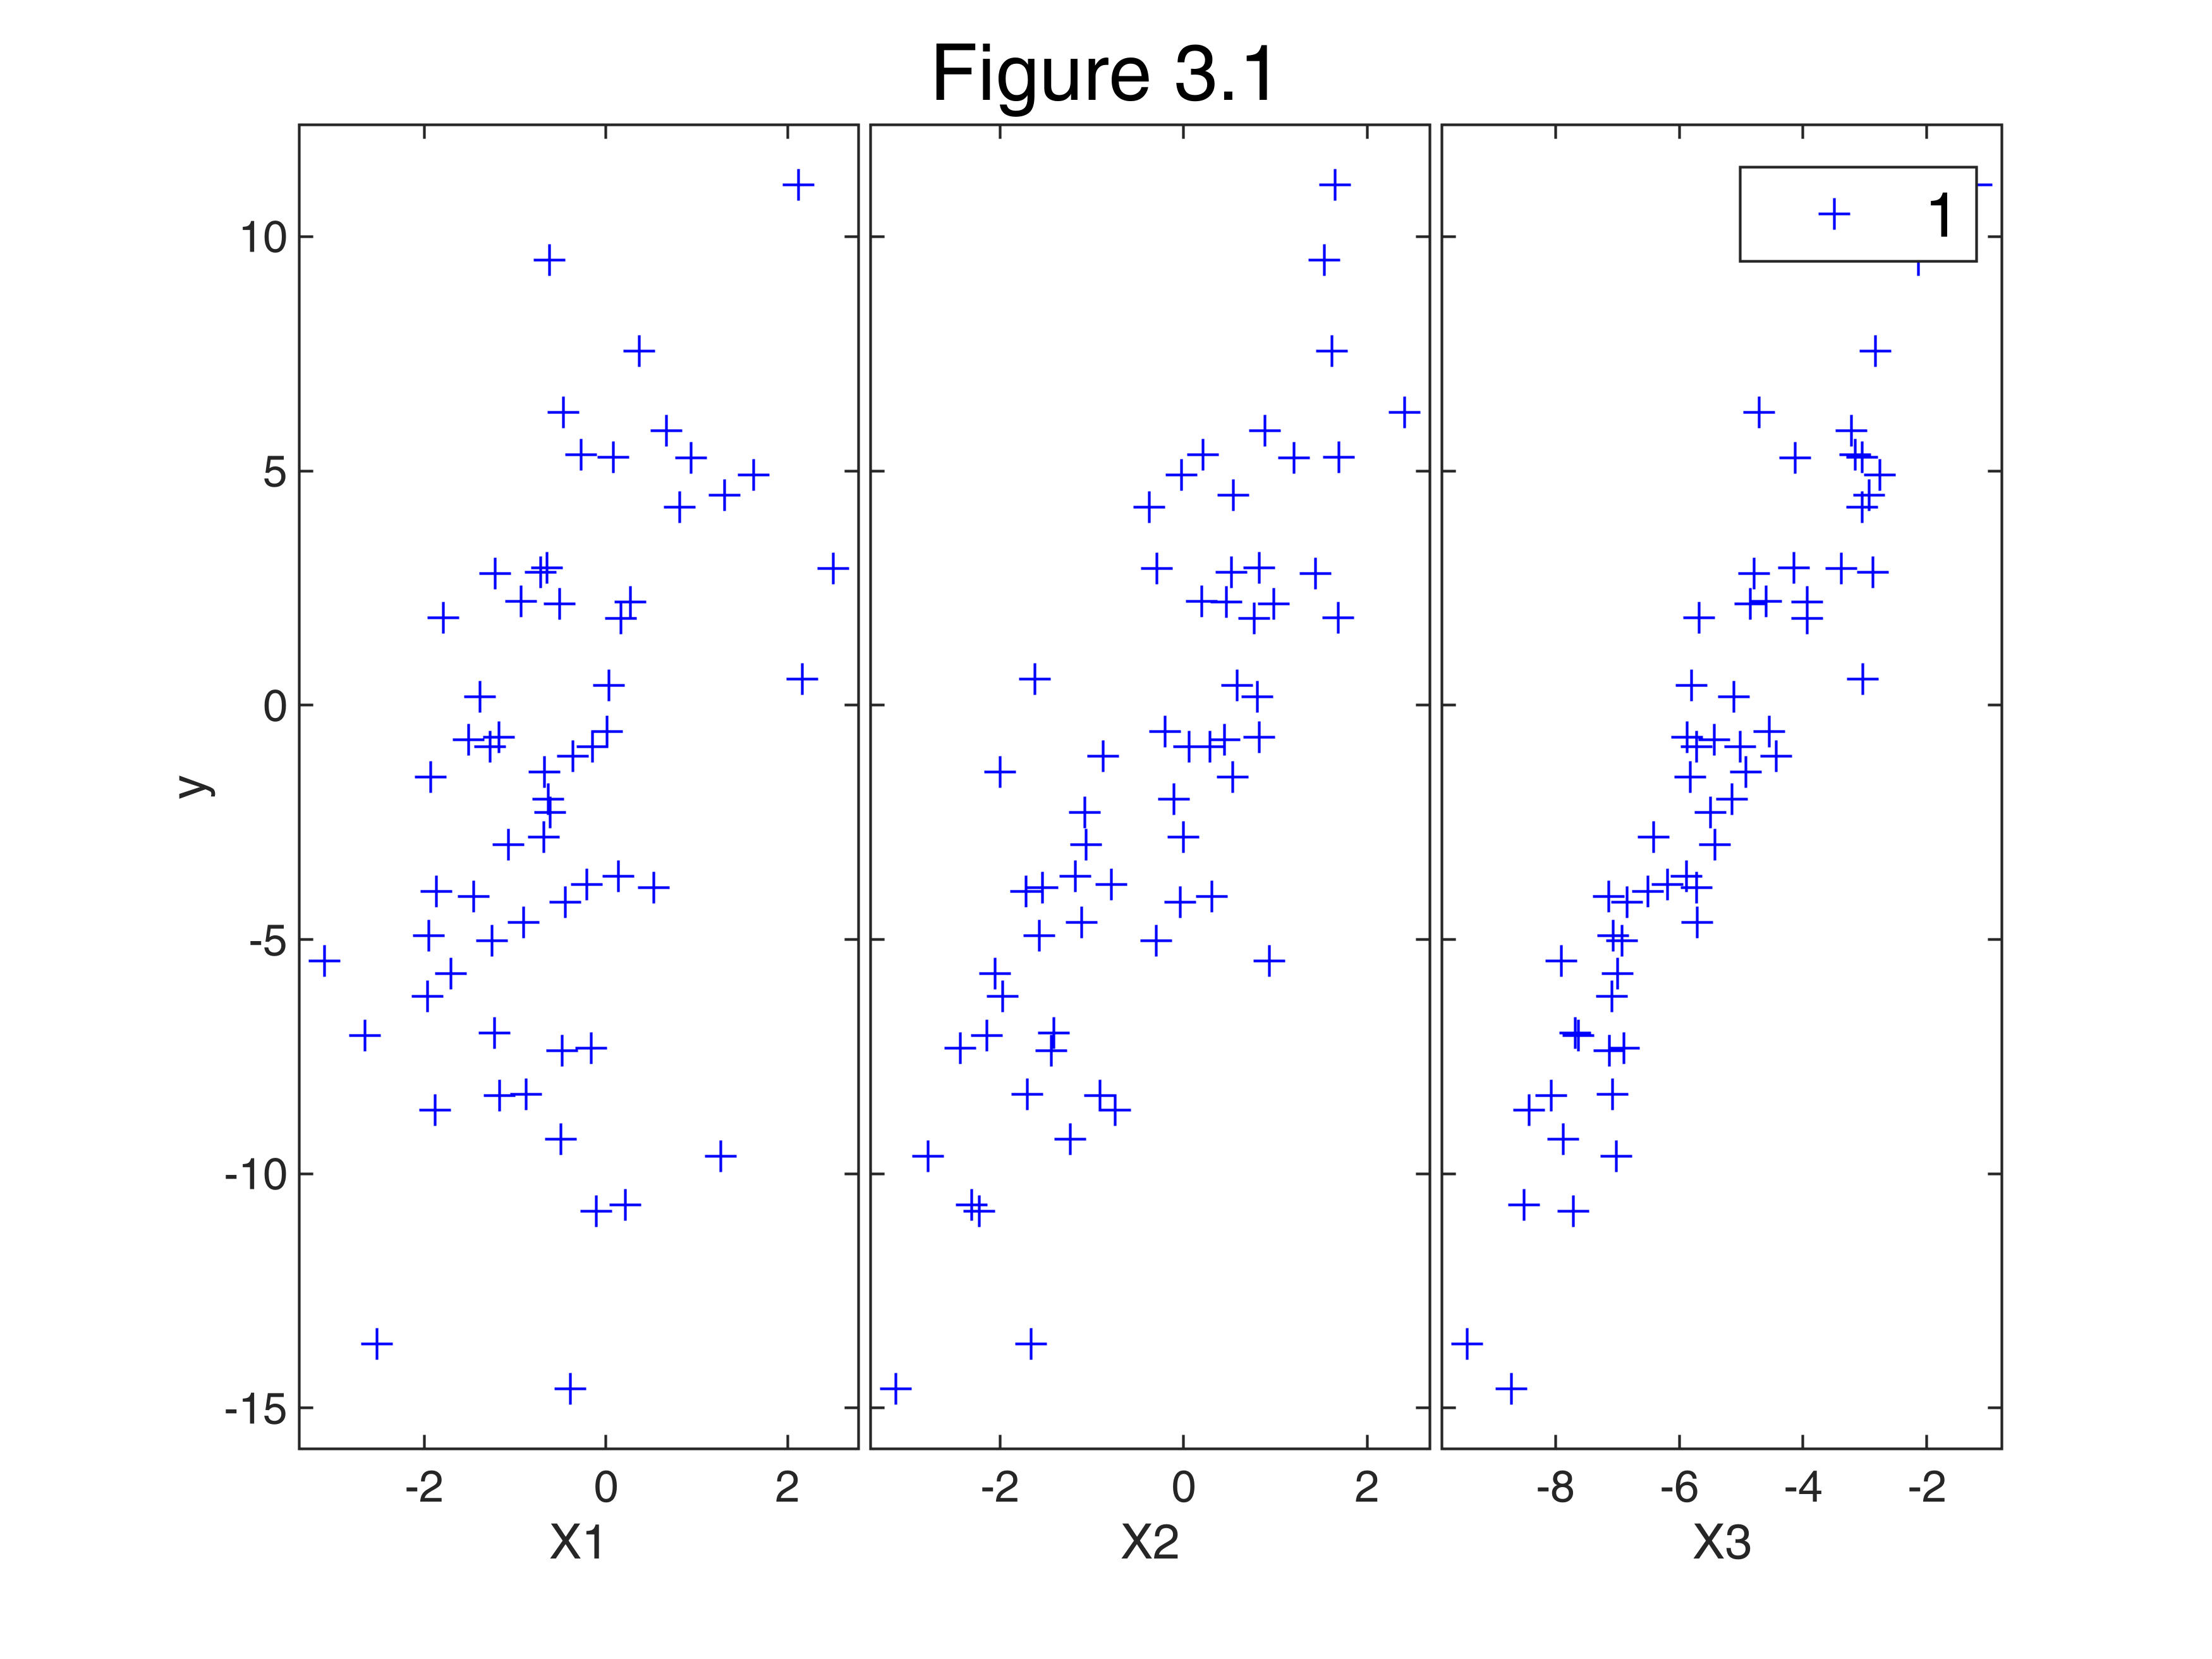

In [2]:
yXplot(y,X);
sgtitle('Figure 3.1')
set(gcf,"Name",'Figure 3.1')

In [3]:

if prin==1
    % print to postscript
    print -depsc AR1.eps;
end

## Create Figure 3.2

In [4]:
outLS=fitlm(X,y);
disp('Traditional ANOVA table based on all the observations')

Traditional ANOVA table based on all the observations

In [5]:
disp(outLS)

Linear regression model:
    y ~ 1 + x1 + x2 + x3
Estimated Coefficients:
                   Estimate      SE       tStat       pValue  
                   ________    _______    ______    __________
    (Intercept)      11.174    0.67501    16.553    3.1288e-23
    x1             -0.21796    0.17244    -1.264       0.21146
    x2               1.4981    0.15534    9.6439    1.6733e-13
    x3               2.2596    0.13668    16.531    3.3265e-23
Number of observations: 60, Error degrees of freedom: 56
Root Mean Squared Error: 1.09
R-squared: 0.965,  Adjusted R-Squared: 0.963
F-statistic vs. constant model: 510, p-value = 1.33e-40


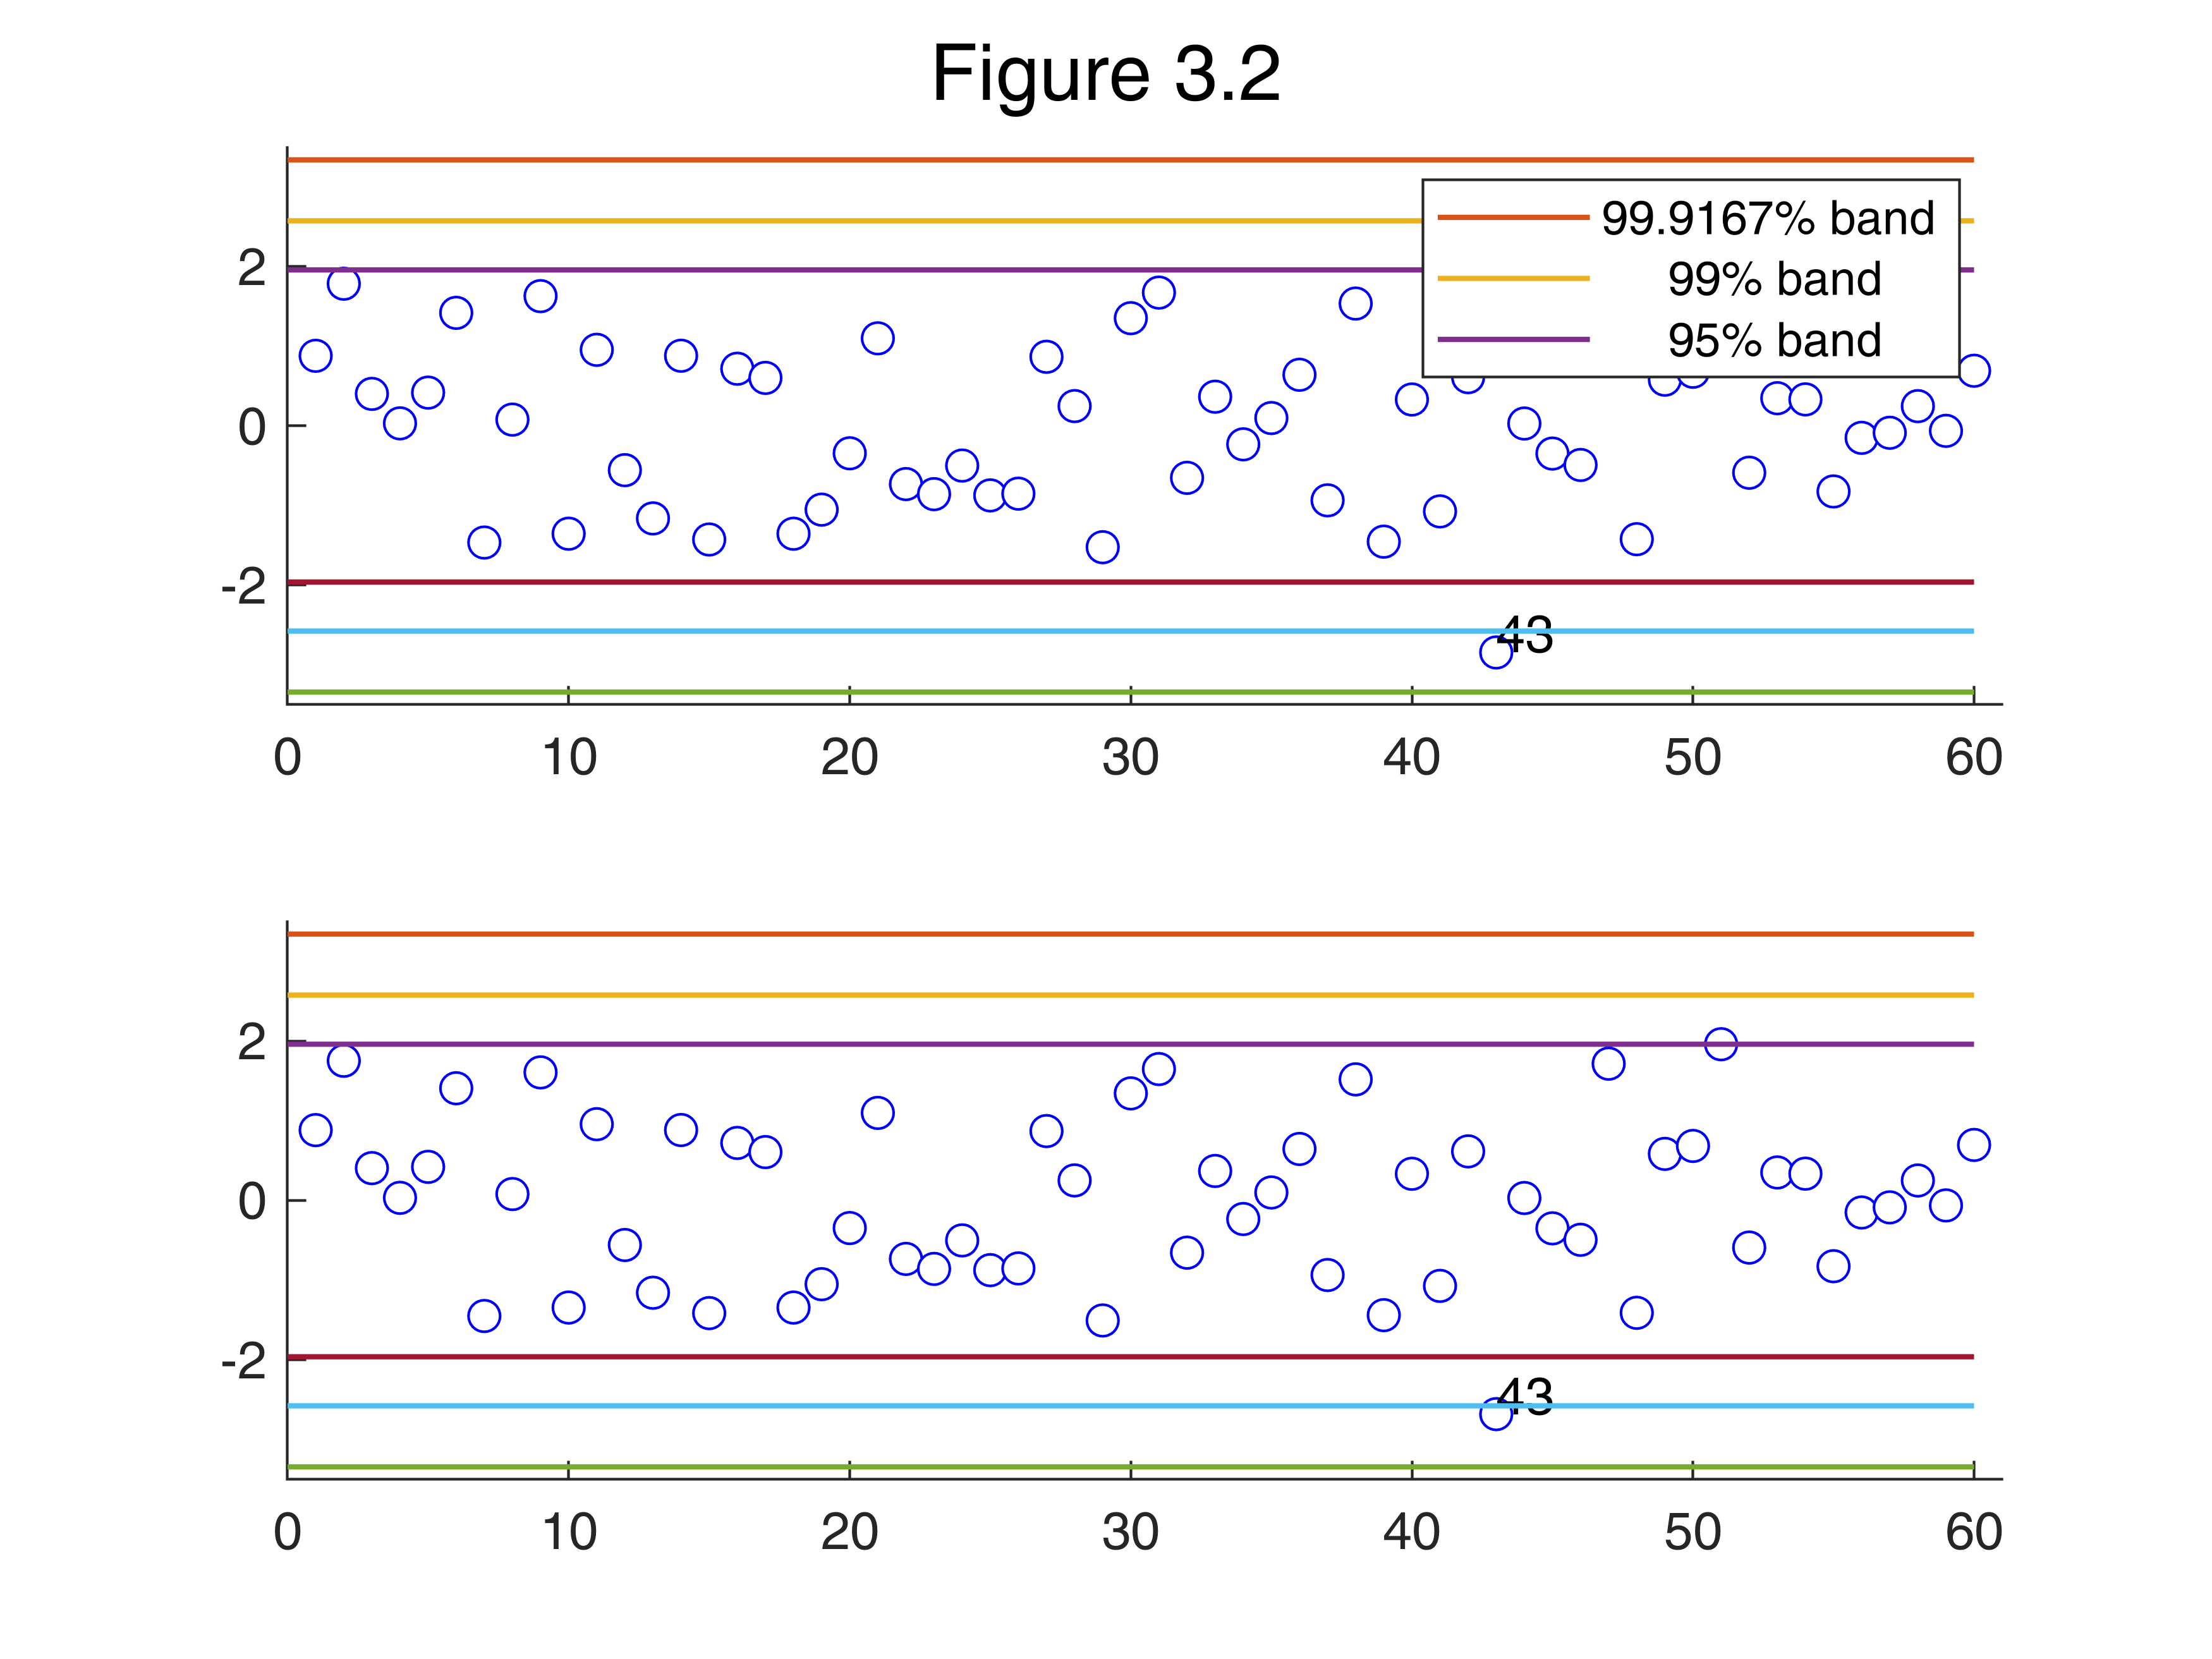

In [6]:
figure
conflev=[0.95 0.99 1-0.05/n];
yl=3.5;
h1=subplot(2,1,1);
resindexplot(outLS.Residuals{:,3},'h',h1,'conflev',conflev,'numlab',{1})
title('')
ylim([-yl yl])
h2=subplot(2,1,2);
resindexplot(outLS.Residuals{:,4},'h',h2,'conflev',conflev,'numlab',{1})
title('')
ylim([-yl yl])

sgtitle('Figure 3.2')
set(gcf,"Name",'Figure 3.2')

In [7]:

if prin==1
    % print to postscript
    print -depsc AR2.eps;
end

## ANOVA table after removing 43

In [8]:
out=fitlm(X,y,'Exclude',43);
disp('Anova table after deleting unit 43')

Anova table after deleting unit 43

In [9]:
disp(out)

Linear regression model:
    y ~ 1 + x1 + x2 + x3
Estimated Coefficients:
                   Estimate      SE        tStat       pValue  
                   ________    _______    _______    __________
    (Intercept)      11.724    0.66472     17.637    2.6658e-24
    x1             -0.32034     0.1664    -1.9251      0.059389
    x2                1.441    0.14773     9.7541    1.3511e-13
    x3               2.3627    0.13378     17.661    2.5023e-24
Number of observations: 59, Error degrees of freedom: 55
Root Mean Squared Error: 1.03
R-squared: 0.969,  Adjusted R-Squared: 0.967
F-statistic vs. constant model: 570, p-value = 2.19e-41

## Create Figure 3.3

qqplot with envelopes + residuals



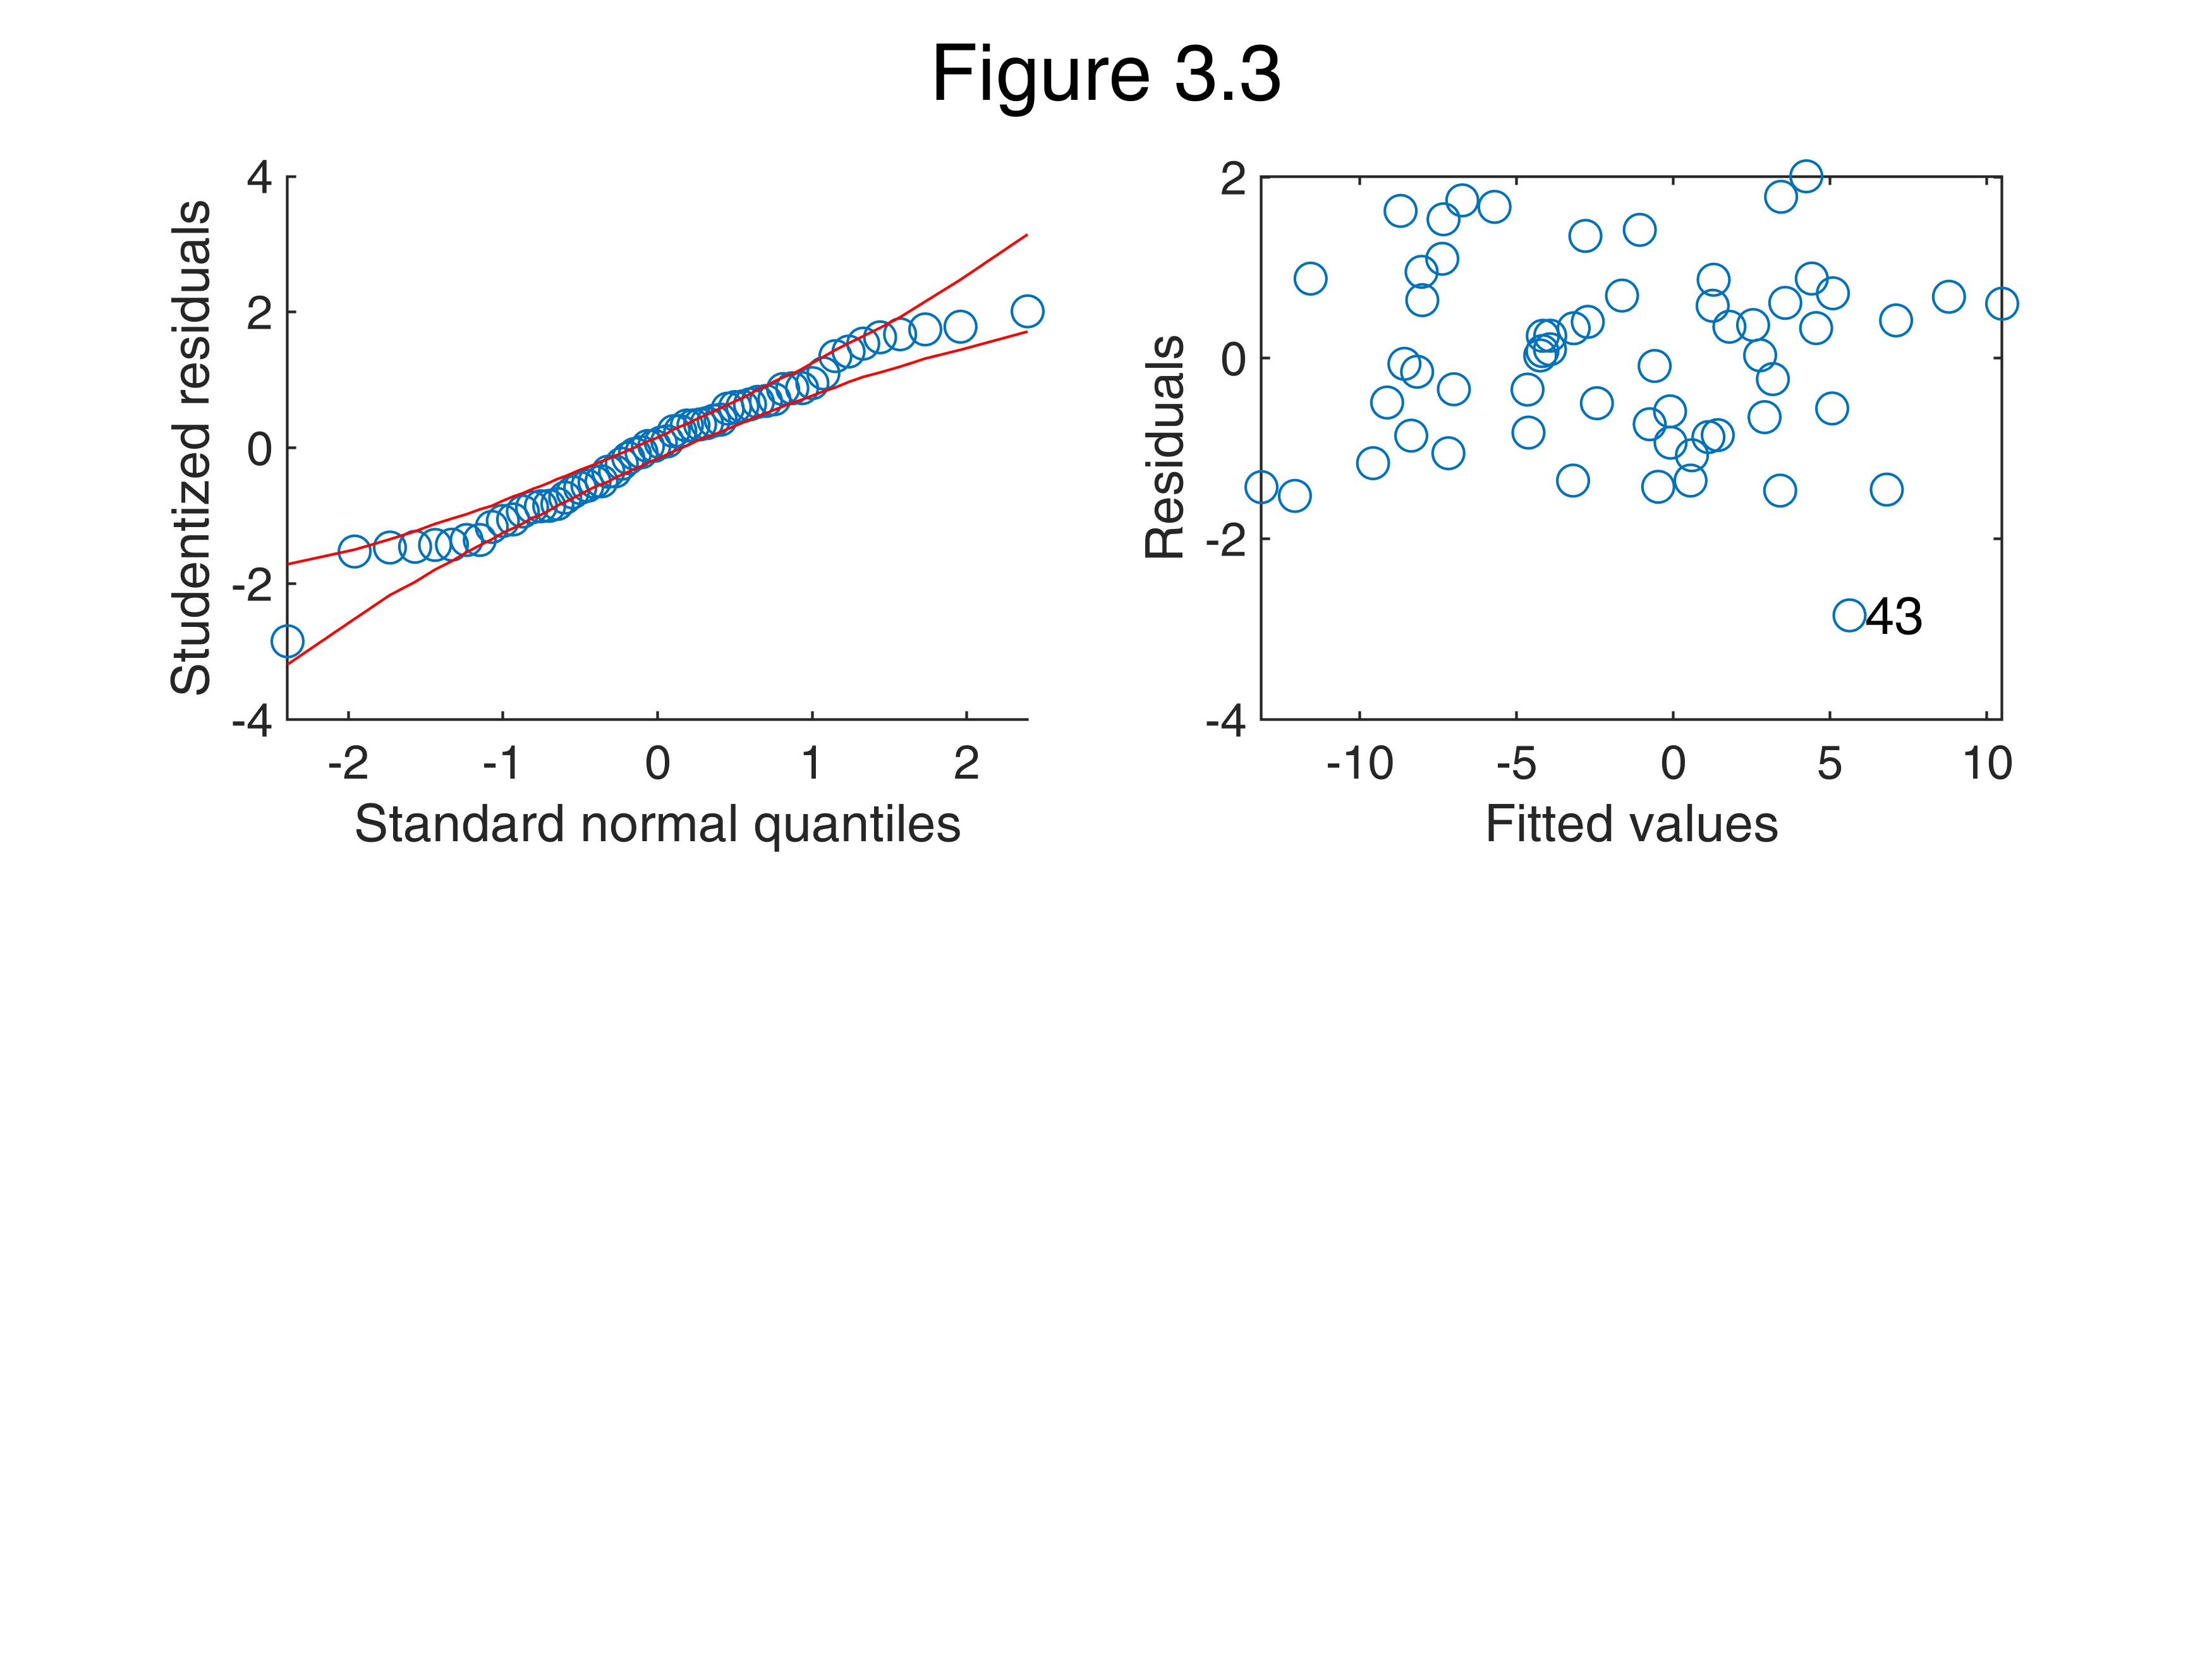

In [10]:
figure
load('multiple_regression.txt');
y=multiple_regression(:,4);
X=multiple_regression(:,1:3);

outLM=fitlm(X,y,'exclude','');
res=outLM.Residuals{:,3};
h1=subplot(2,2,1);
qqplotFS(res,'X',X,'plots',1,'h',h1);
% title('qqplot of stud. res.')

subplot(2,2,2);
plot(outLM.Fitted,res,'o')
sel=43;
text(outLM.Fitted(sel)+0.5,res(sel),num2str(sel))
xlabel('Fitted values')
ylabel('Residuals')

sgtitle('Figure 3.3')
set(gcf,"Name",'Figure 3.3')

In [11]:

if prin==1
    % print to postscript
    print -depsc AR3.eps;
end

## Create Figure 3.4:

Added variable plot to show the importance of units 9 21 30 31 38 47



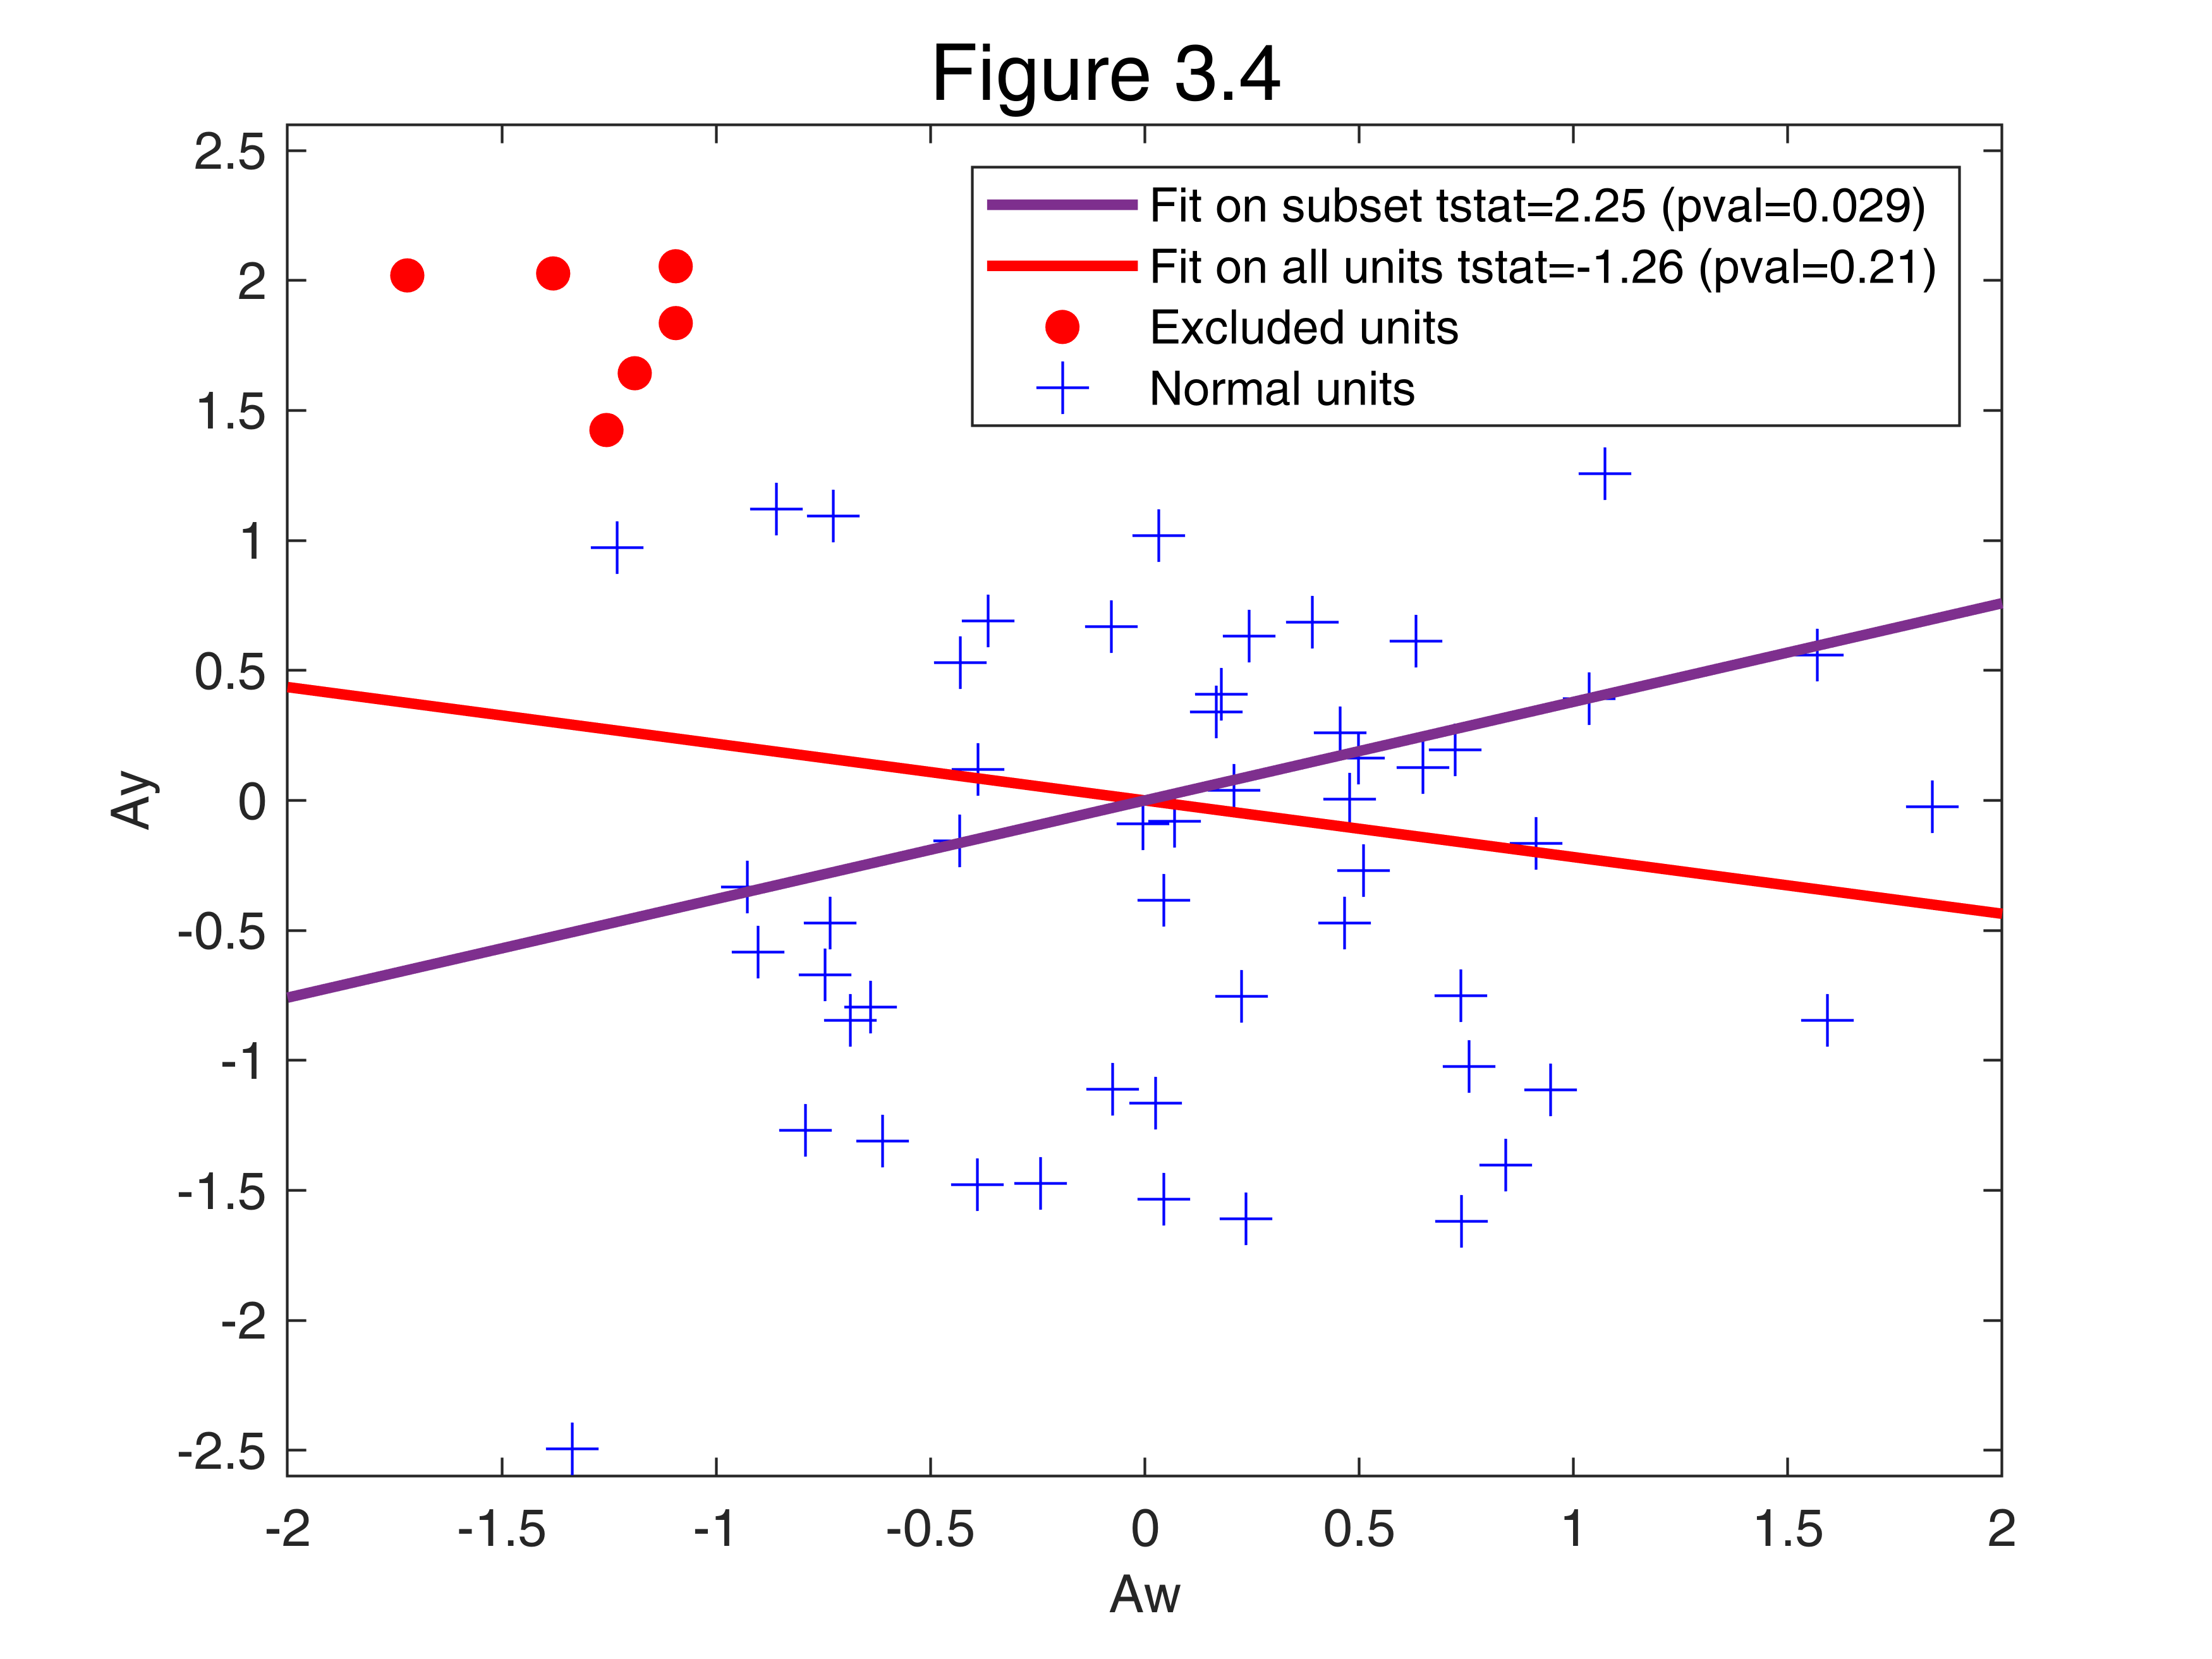

In [12]:
% Computes in a new plot the added variable plot with and without the
% outliers
figure;
% Set Font Size for the title
fsiztitl=10;
% Set Font Size for the labels on the axes
SizeAxesNum=10;
outADD=addt(y,X(:,2:3),X(:,1),'plots',1,'units',[9 21 30 31 38 47]','textlab','y','FontSize',fsiztitl,'SizeAxesNum',SizeAxesNum);
ylim([-2.6 2.6])

sgtitle('Figure 3.4')
set(gcf,"Name",'Figure 3.4')

In [13]:

if prin==1
    % print to postscript
    print -depsc AR4.eps;
end

## Create Figure 3.5

Compute the added variable plot with and without unit 43



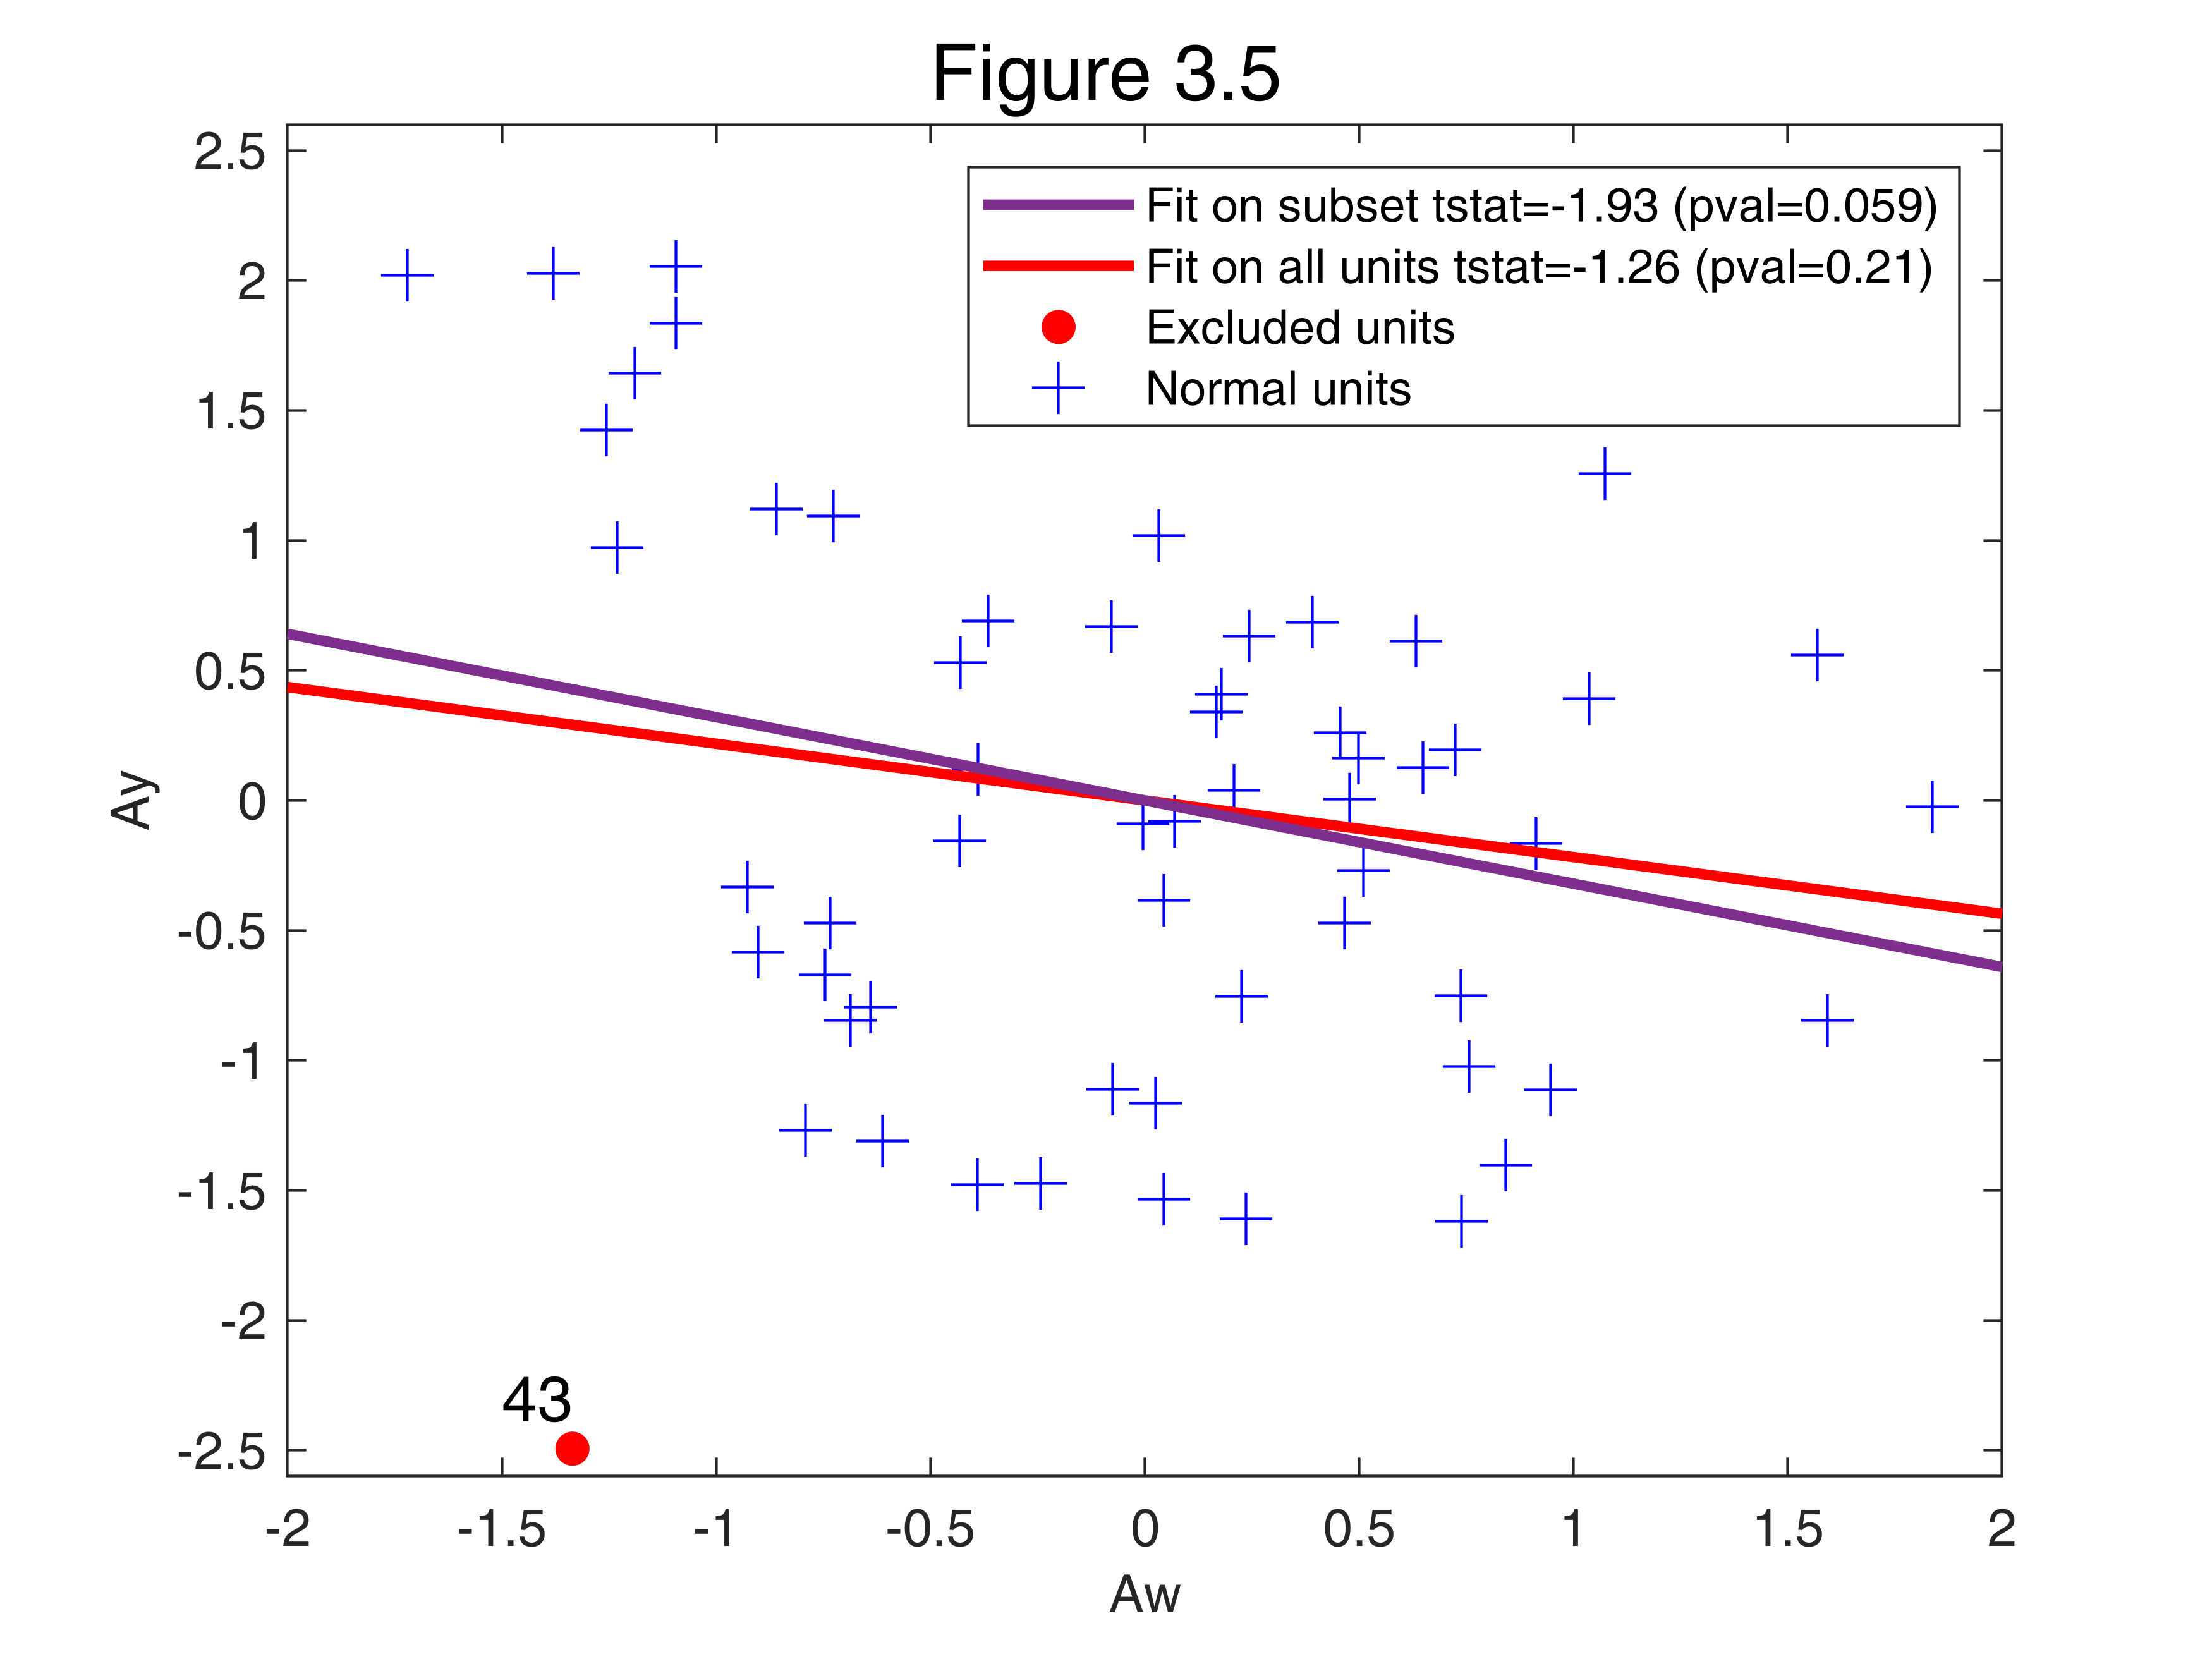

In [14]:
figure;
out43=addt(y,X(:,2:3),X(:,1),'plots',1,'units',43','textlab','y','FontSize',fsiztitl,'SizeAxesNum',SizeAxesNum);
text(-1.5,-2.3,'43','FontSize',12)
ylim([-2.6 2.6])
sgtitle('Figure 3.5')
set(gcf,"Name",'Figure 3.5')

In [15]:

if prin==1
    % print to postscript
    print -depsc AR5.eps;
end

## Create Figure 3.8

Traditional robust analysis based on S estimators S estimators with 2 values of breakdown point


In [16]:
conflev=[0.95 0.99];
% Note that the pattern of residuals changes completely
% Using bdp=0.5 the outliers are correctly found, on the other hand using
% bdp=0.25 the masking effect is clear
figure;
h1=subplot(2,1,1);
bdp=0.25;
[out]=Sreg(y,X,'nsamp',3000,'bdp',bdp);

Total estimated time to complete S estimate:  0.27 seconds

In [17]:
resindexplot(out,'h',h1,'conflev',conflev);
ylabel(['Breakdown point =' num2str(bdp)])
h2=subplot(2,1,2);
bdp=0.5;
[out]=Sreg(y,X,'nsamp',3000,'bdp',bdp);

Total estimated time to complete S estimate:  0.72 seconds


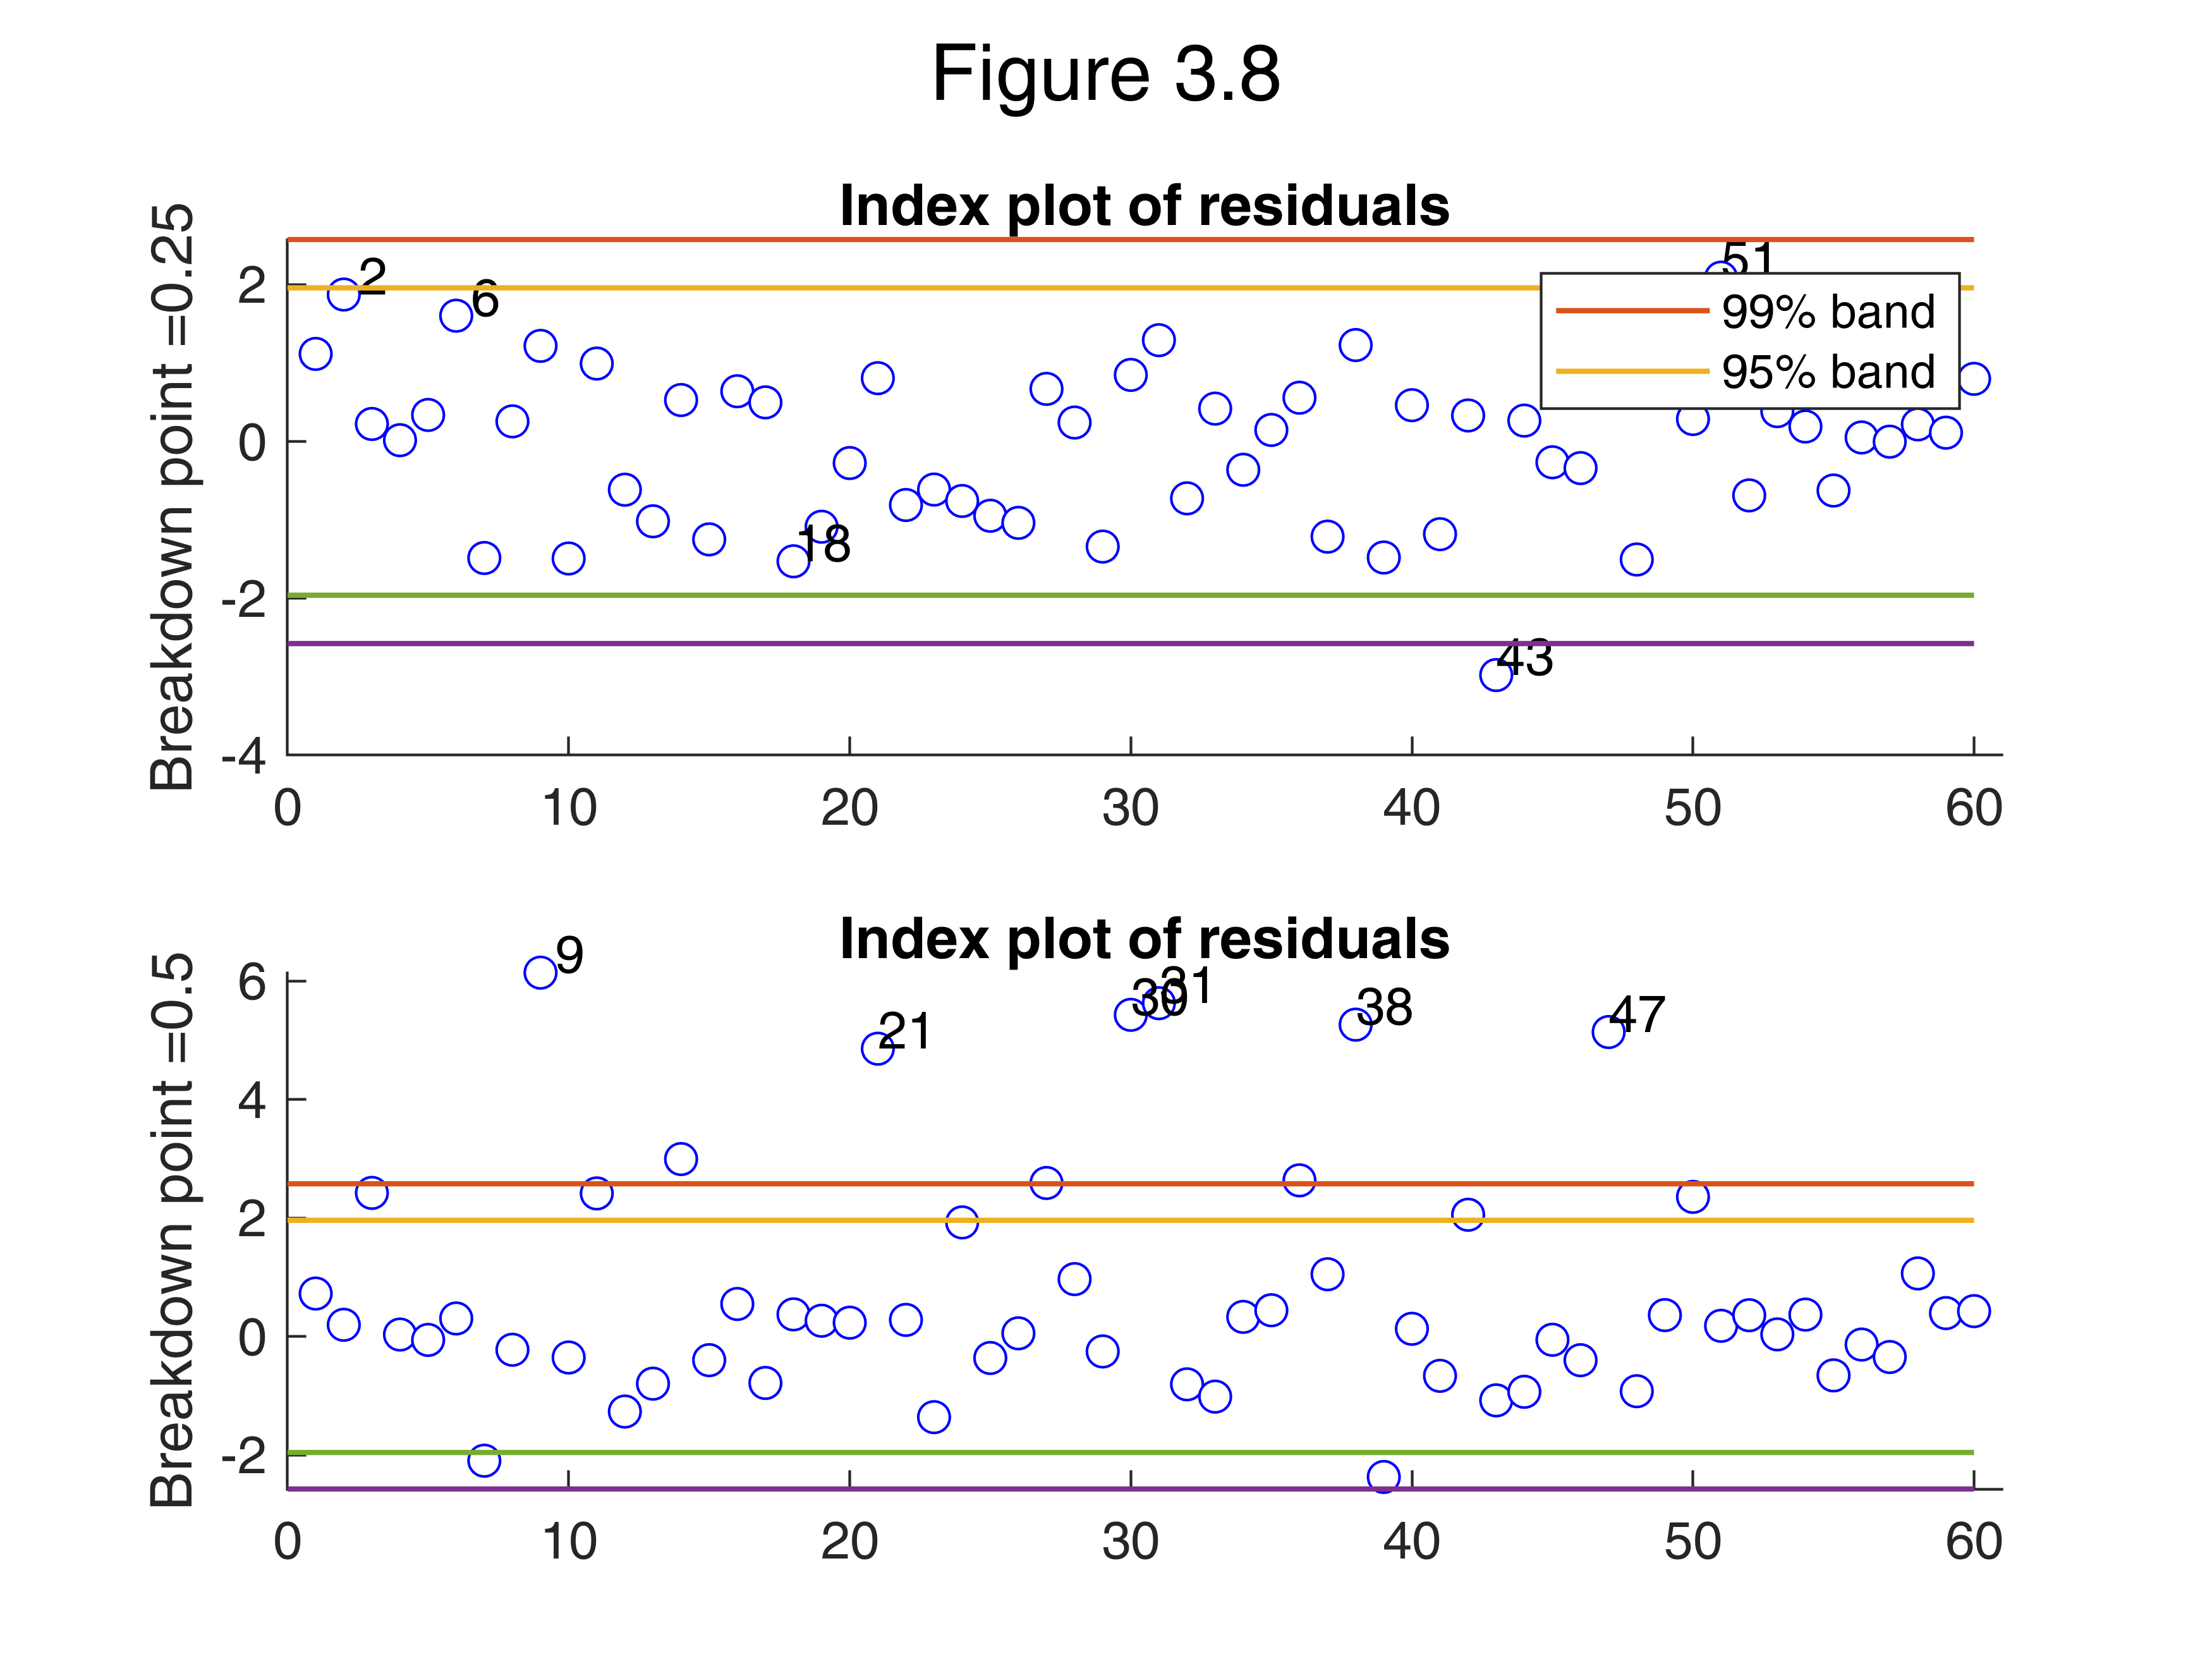

In [18]:
resindexplot(out,'h',h2,'conflev',conflev,'numlab',{6});
ylabel(['Breakdown point =' num2str(bdp)])

sgtitle('Figure 3.8')
set(gcf,"Name",'Figure 3.8')

In [19]:

if prin==1
    % print to postscript
    print -depsc ARtradrobS.eps;
end

## Create Figure 3.9
## MR: (Multiple regression data): MM estimators with 2 values of efficiency

In [20]:
% MMreg using two different level of efficiency
conflev=[0.95 0.99];
% Note that the pattern of residuals changes completely
% Using eff=0.90 the outliers are correctly found, on the other hand using
% eff=0.95 the masking effect is clear
figure;
h1=subplot(2,1,1);
eff=0.90;
[out]=MMreg(y,X,'Snsamp',3000,'eff',eff);

Total estimated time to complete S estimate:  0.51 seconds

In [21]:
resindexplot(out,'h',h1,'conflev',conflev,'numlab',{6});
ylabel(['Eff.=' num2str(eff)])
h2=subplot(2,1,2);
eff=0.95;
[out]=MMreg(y,X,'Snsamp',3000,'eff',eff);

Total estimated time to complete S estimate:  0.23 seconds


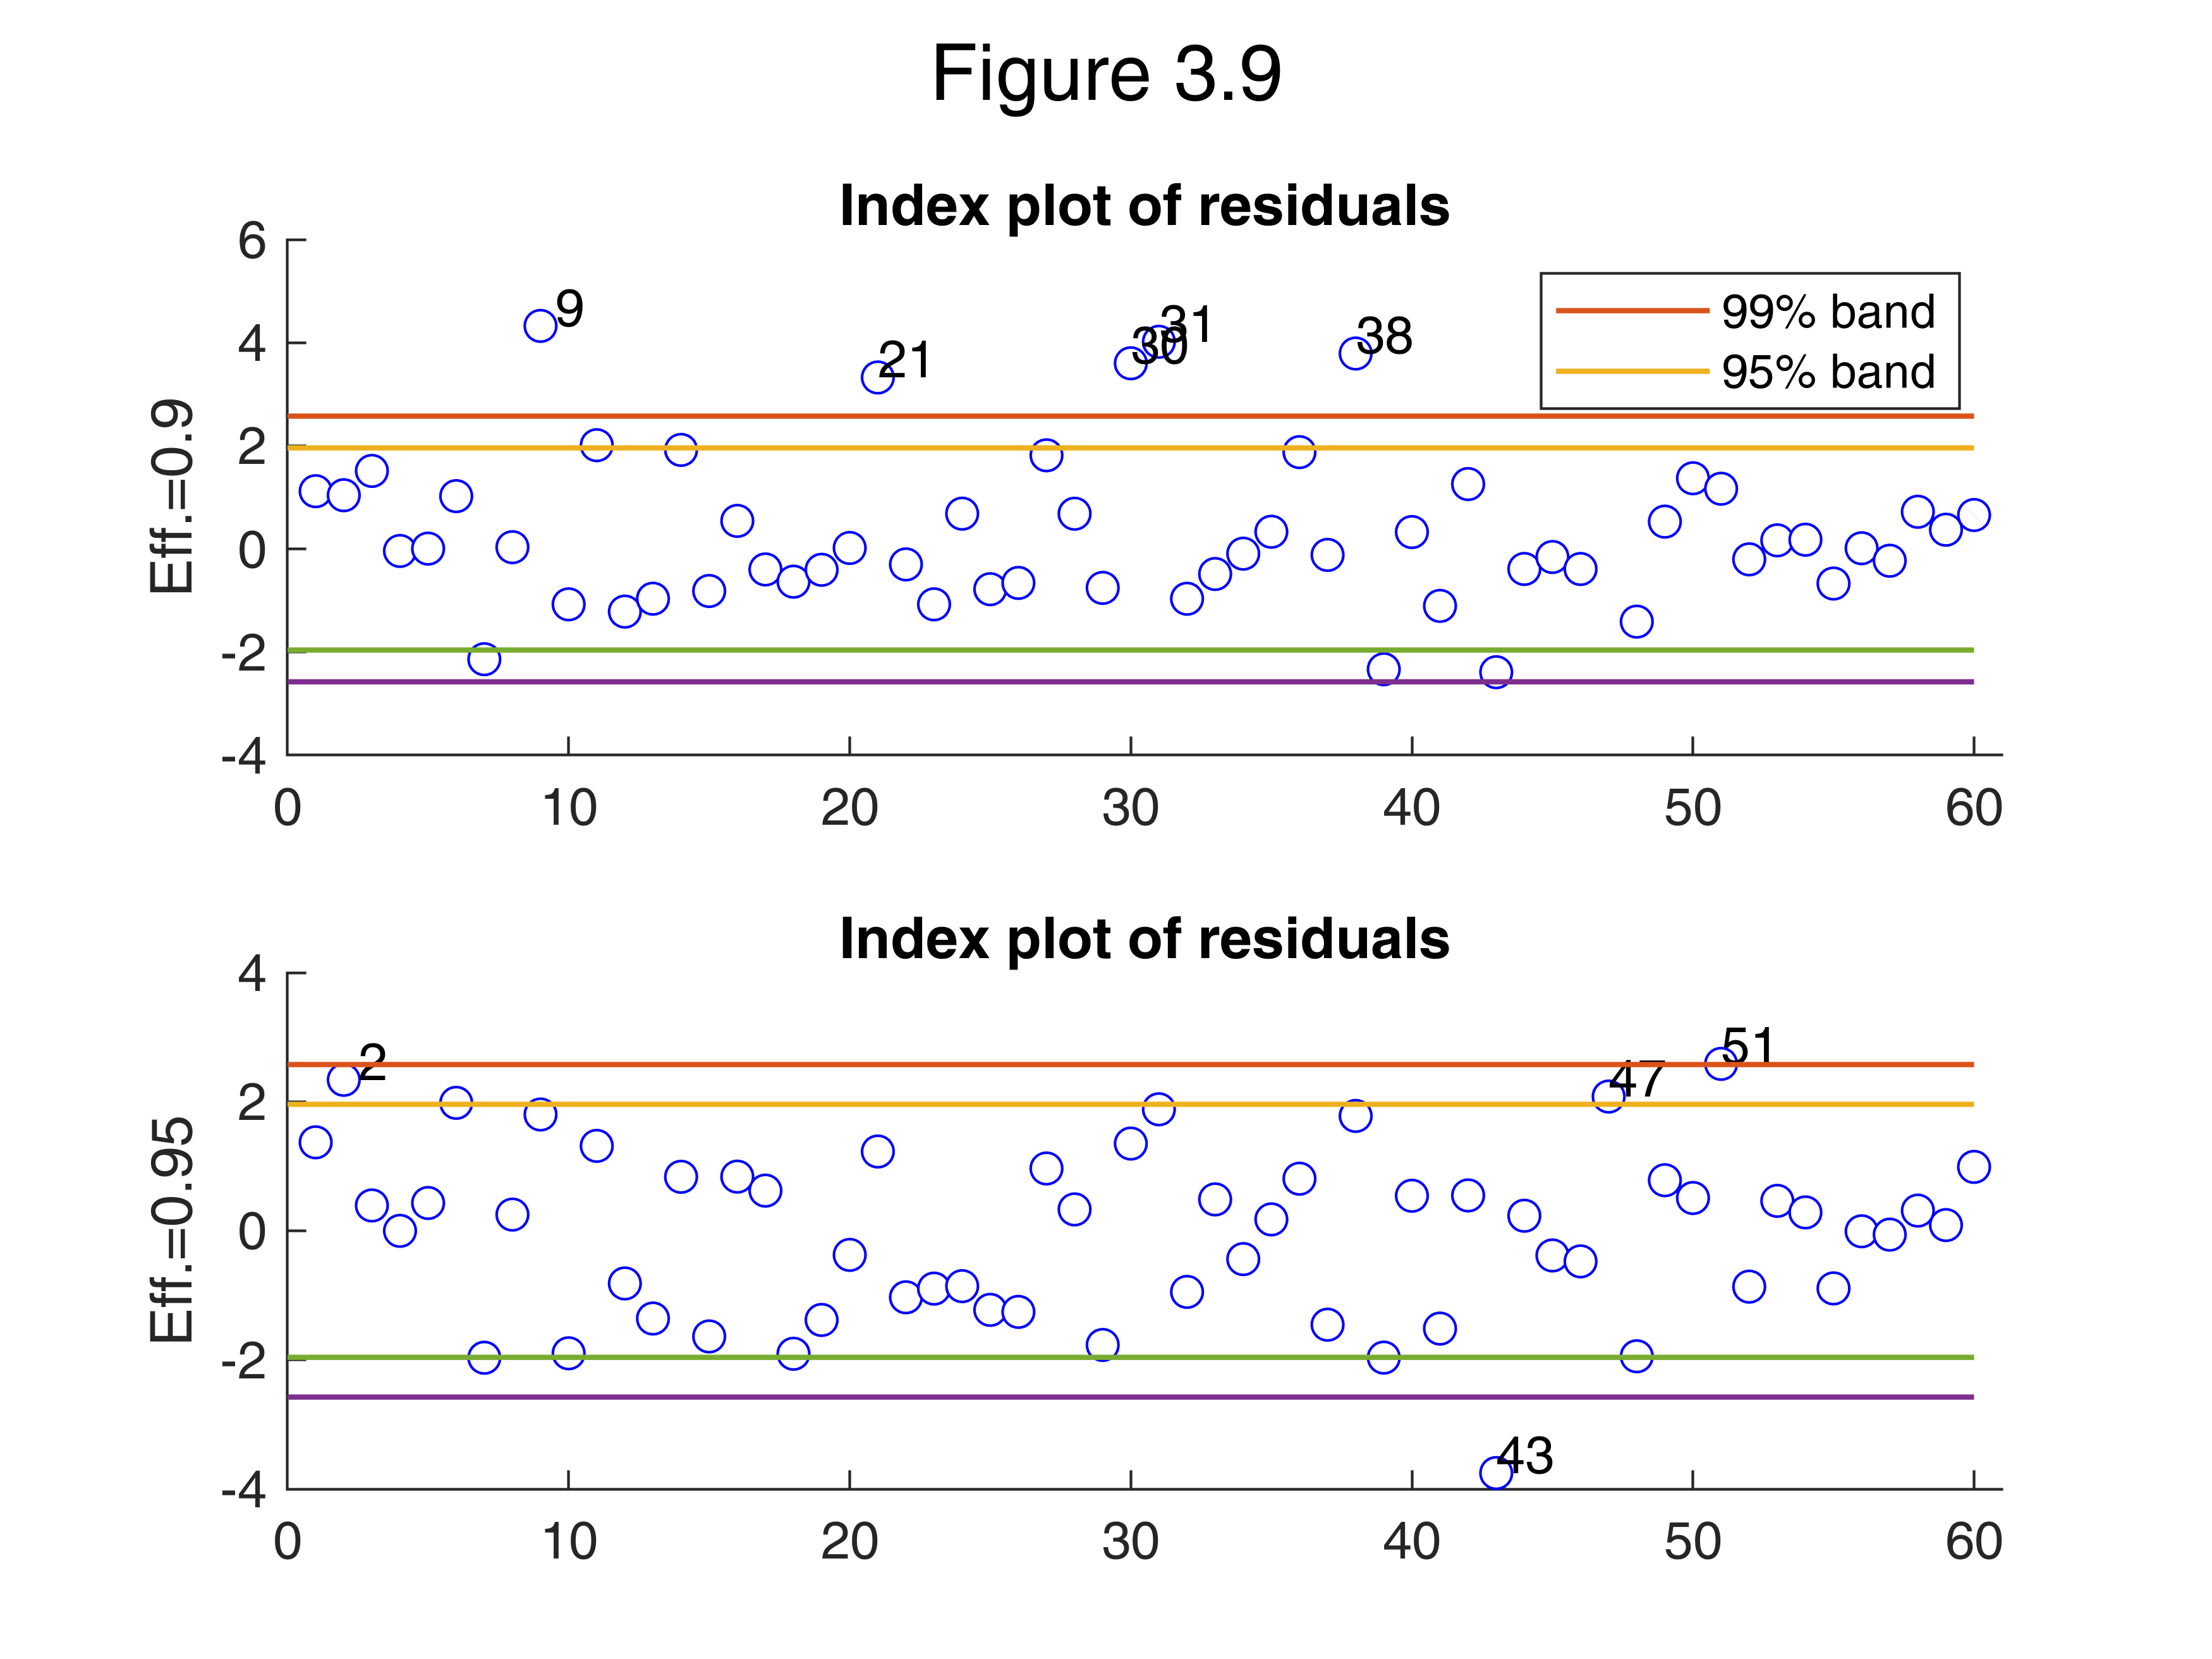

In [22]:
resindexplot(out,'h',h2,'conflev',conflev,'numlab',{4});
ylabel(['Eff.=' num2str(eff)])
sgtitle('Figure 3.9')
set(gcf,"Name",'Figure 3.9')

In [23]:

if prin==1
    % print to postscript
    print -depsc ARtradrobMM.eps;
end

%InsideREADME